# 主力期货聚类可视化

## 杨鸿铭 2021103847

导入所需模块

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pandas as pd
from sklearn import cluster, covariance, manifold  
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
# 查询当前系统所有字体
from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	Agency FB
	Algerian
	Arial
	Arial Rounded MT Bold
	Bahnschrift
	Baskerville Old Face
	Bauhaus 93
	Bell MT
	Berlin Sans FB
	Berlin Sans FB Demi
	Bernard MT Condensed
	Blackadder ITC
	Bodoni MT
	Book Antiqua
	Bookman Old Style
	Bookshelf Symbol 7
	Bradley Hand ITC
	Britannic Bold
	Broadway
	Brush Script MT
	Calibri
	Californian FB
	Calisto MT
	Cambria
	Candara
	Castellar
	Centaur
	Century
	Century Gothic
	Century Schoolbook
	Chiller
	Colonna MT
	Comic Sans MS
	Consolas
	Constantia
	Cooper Black
	Copperplate Gothic Bold
	Copperplate Gothic Light
	Corbel
	Courier New
	Curlz MT
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	DengXian
	Dubai
	Ebrima
	Edwardian Script ITC
	Elephant
	Engravers MT
	Eras Bold ITC
	Eras Demi ITC
	Eras Light ITC
	Eras Medium ITC
	FZCuHeiSongS-B-GB
	FZShuTi
	FZYaoTi
	FangSong
	Felix Titling
	Footlight MT Light
	Forte
	Franklin Gothic Book
	Franklin Gothic Demi
	Franklin Gothic

In [3]:
from matplotlib import pyplot as plt
#新增加的两行
import matplotlib
matplotlib.rc("font",family='STXihei')

获取所有期货信息

In [2]:
info = pd.read_csv('futures_info.csv', header=0, index_col=0)
info.head(10)

,display_name,name,start_date,end_date,type
A0501.XDCE,豆一0501,a0501,2003-07-15,2005-01-17,futures
A0503.XDCE,豆一0503,a0503,2003-09-15,2005-03-14,futures
A0505.XDCE,豆一0505,a0505,2003-11-17,2005-05-20,futures
A0507.XDCE,豆一0507,a0507,2004-01-16,2005-07-14,futures
A0509.XDCE,豆一0509,a0509,2004-03-15,2005-09-14,futures
A0511.XDCE,豆一0511,a0511,2004-05-24,2005-11-14,futures
A0601.XDCE,豆一0601,a0601,2004-07-15,2006-01-17,futures
A0603.XDCE,豆一0603,a0603,2004-09-15,2006-03-14,futures
A0605.XDCE,豆一0605,a0605,2004-11-15,2006-05-19,futures
A0607.XDCE,豆一0607,a0607,2005-01-18,2006-07-14,futures


选出主力期货

In [3]:
main = info[info['name'].str.contains('9999')]
main.head(10)

,display_name,name,start_date,end_date,type
A9999.XDCE,豆一主力合约,A9999,2005-01-03,2030-01-01,futures
AG9999.XSGE,白银主力合约,AG9999,2012-05-10,2030-01-01,futures
AL9999.XSGE,铝主力合约,AL9999,2005-01-03,2030-01-01,futures
AP9999.XZCE,苹果主力合约,AP9999,2017-12-22,2030-01-01,futures
AU9999.XSGE,黄金主力合约,AU9999,2008-01-09,2030-01-01,futures
B9999.XDCE,豆二主力合约,B9999,2005-01-03,2030-01-01,futures
BB9999.XDCE,胶合板主力合约,BB9999,2013-12-06,2030-01-01,futures
BC9999.XINE,阴极铜主力合约,BC9999,2020-11-19,2030-01-01,futures
BU9999.XSGE,石油沥青主力合约,BU9999,2013-10-09,2030-01-01,futures
C9999.XDCE,玉米主力合约,C9999,2005-01-03,2030-01-01,futures


选出合约开始时间在2021-01-01以前以及结束时间在2021-12-31以后的合约

In [4]:
main['start_date'] = pd.to_datetime(main['start_date'])
main['end_date'] = pd.to_datetime(main['end_date'])
main_l = main[(main['start_date']<'2021-01-01') & (main['end_date'] > '2021-12-31')]
main_l.head()

C:\Users\YHM\AppData\Local\Temp/ipykernel_16968/333941004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['start_date'] = pd.to_datetime(main['start_date'])
C:\Users\YHM\AppData\Local\Temp/ipykernel_16968/333941004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['end_date'] = pd.to_datetime(main['end_date'])


,display_name,name,start_date,end_date,type
A9999.XDCE,豆一主力合约,A9999,2005-01-03,2030-01-01,futures
AG9999.XSGE,白银主力合约,AG9999,2012-05-10,2030-01-01,futures
AL9999.XSGE,铝主力合约,AL9999,2005-01-03,2030-01-01,futures
AP9999.XZCE,苹果主力合约,AP9999,2017-12-22,2030-01-01,futures
AU9999.XSGE,黄金主力合约,AU9999,2008-01-09,2030-01-01,futures


获取期货ID以及期货名称

In [5]:
ID = list(main_l.index)

name = list(main_l['display_name'])

shortnames = []
for i in name:
    shortnames.append(i[:-4])
shortnames

df_name = pd.DataFrame({'ID':ID, 'name':name, 'shortname':shortnames})
df_name

,ID,name,shortname
0,A9999.XDCE,豆一主力合约,豆一
1,AG9999.XSGE,白银主力合约,白银
2,AL9999.XSGE,铝主力合约,铝
3,AP9999.XZCE,苹果主力合约,苹果
4,AU9999.XSGE,黄金主力合约,黄金
...,...,...,...
63,WH9999.XZCE,强麦主力合约,强麦
64,WR9999.XSGE,线材主力合约,线材
65,Y9999.XDCE,豆油主力合约,豆油
66,ZC9999.XZCE,动力煤主力合约,动力煤


构建主力期货字典

In [6]:
df = {}
for i in ID[:]:
    df[i] = pd.read_csv('%s' % i + '.csv', header=0, index_col=0)

df_A = df['A9999.XDCE']

构建主力期货每日收盘价格数据框

In [7]:
date_index_close = list(df_A.index)
date_index_close
futuresMat_close = pd.DataFrame(index=date_index_close)

num = len(ID)
for i in range(num):
    #连接不同期货价格并对列重命名
    futuresMat_close = pd.concat([futuresMat_close, df[ID[i]]['close']], axis=1).rename(columns={'close': shortnames[i]}) 

# sum(futuresMat_close.isnull().any())

构建主力期货每日开盘价格数据框

In [8]:
date_index_open = list(df_A.index)
date_index_open
futuresMat_open = pd.DataFrame(index=date_index_open)

for i in range(num):
    #连接不同期货价格并对列重命名
    futuresMat_open = pd.concat([futuresMat_open, df[ID[i]]['open']], axis=1).rename(columns={'open': shortnames[i]}) 

# sum(futuresMat_open.isnull().any())

构建收盘开盘价格差数据框

In [9]:
variation = futuresMat_close - futuresMat_open
np.shape(variation)
# sum(variation.isnull().any())

(198, 68)

In [12]:
# ratio = variation / futuresMat_open
# sum(ratio.isnull().any())

# ratio = ratio[ratio.columns[ratio.apply(np.sum,axis=0)!=0]]

In [13]:
edge_model = covariance.GraphicalLassoCV(cv=5) 

X = variation.copy()
X /= X.std(axis=0)

X.dropna(axis=1, inplace=True)

edge_model.fit(X)

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


GraphicalLassoCV(cv=5)

Text(428.640625, 0.5, 'Futures')

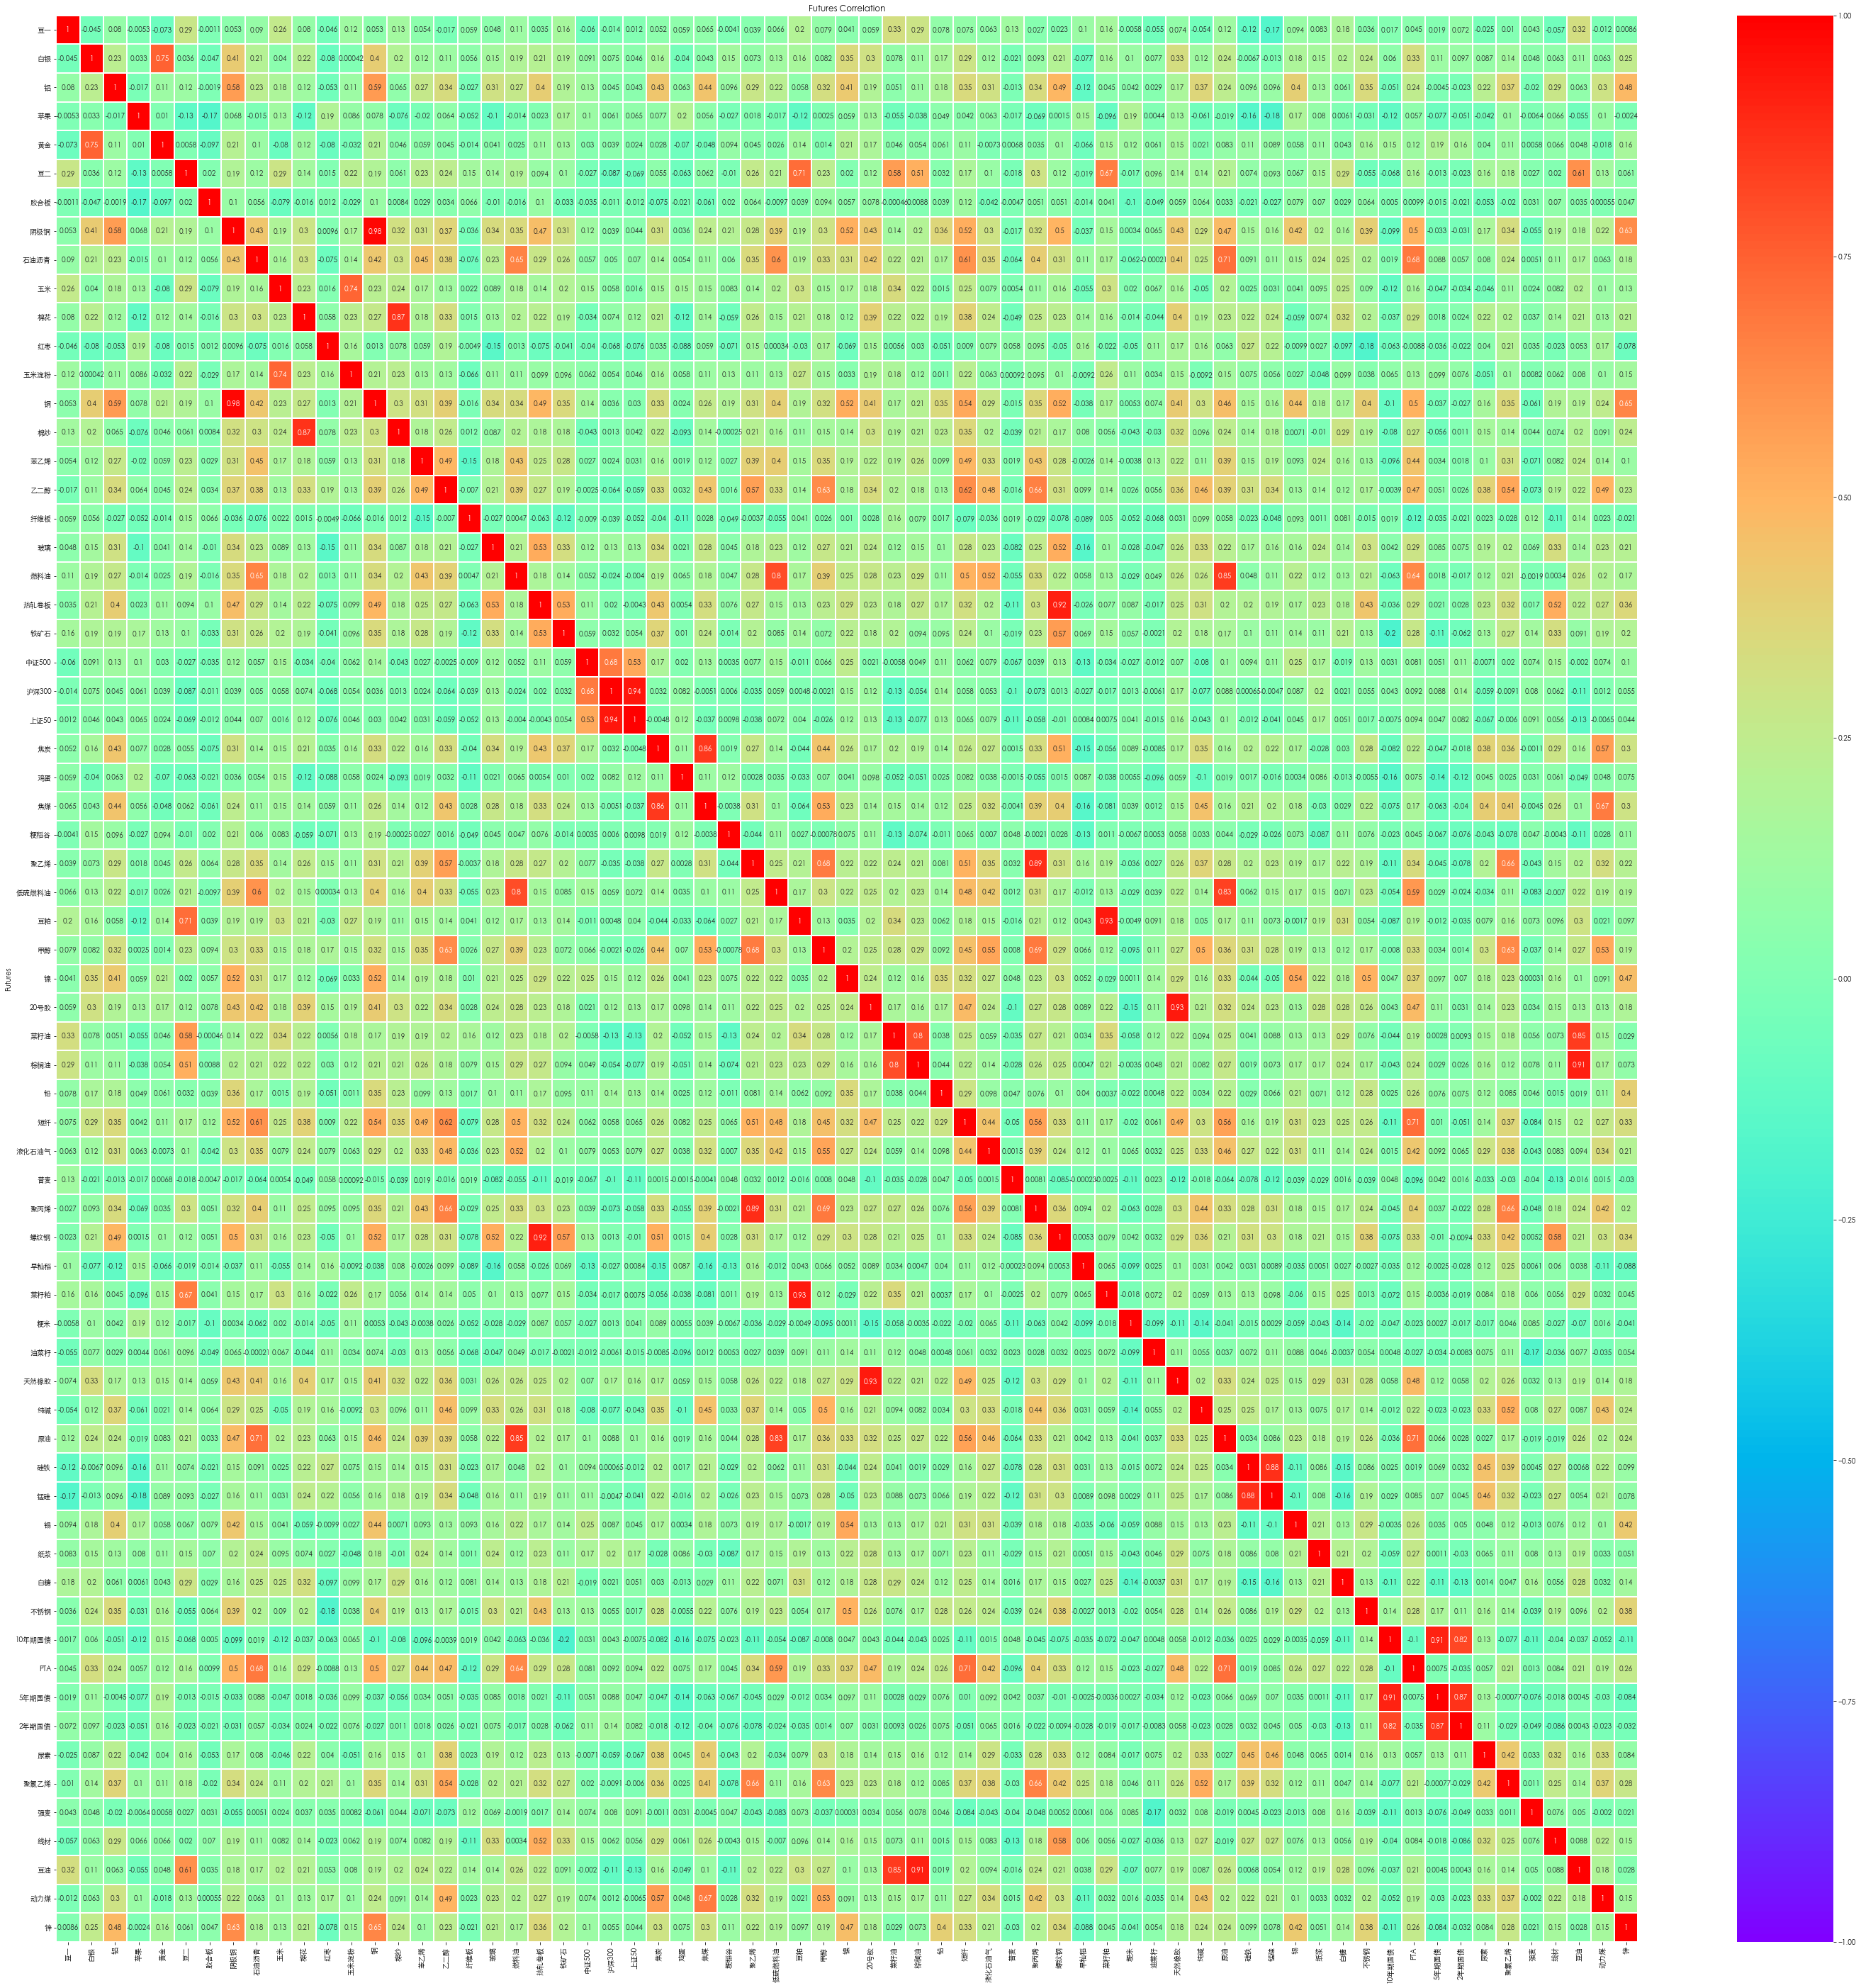

In [26]:
X

XCorr = X.corr()

fig, ax = plt.subplots(figsize=(50, 50))
 
sns.heatmap(XCorr, linewidths = 0.05, ax = ax, vmax=1, vmin=-1, cmap='rainbow', annot=True)
ax.set_title('Futures Correlation')
ax.set_xlabel('')
# ax.set_xticklabels([]) #设置x轴图例为空值
ax.set_ylabel('Futures')
# ax.figure.savefig('Futures Correlation.jpg')

In [14]:
code = X.columns

In [10]:
class Futures:
    def __init__(self, future):
        self.future = future
        
        
    def getinfo(self):
        df = pd.read_csv('futures_info.csv', header=0, index_col=0)
        main = df[df['name'].str.contains('9999')]
        
        main['start_date'] = pd.to_datetime(main['start_date'])
        main['end_date'] = pd.to_datetime(main['end_date'])
        main_l = main[(main['start_date']<'2021-01-01') & (main['end_date'] > '2021-12-31')]

        ID = list(main_l.index)
        name = list(main_l['display_name'])
        shortnames = []
        for i in name:
            shortnames.append(i[:-4])
        df_name = pd.DataFrame({'ID':ID, 'name':name, 'shortname':shortnames})
        if '9999' in self.future:
            return df_name[df_name['ID'].isin([self.future])]
        elif '主力期货'in self.future:
            return df_name[df_name['name'].isin([self.future])]
        else:
            return df_name[df_name['shortname'].isin([self.future])]
    
    def getID(self):
        return list(self.getinfo()['ID'])
        
    def getfullname(self):
        return list(self.getinfo()['name'])
    
    def getshortname(self):
        return list(self.getinfo['shortname'])
    
    def getdata(self, future):
        data = pd.read_csv('%s' % self.getID() + '.csv', header=0, index_col=0)
        return data
    
    def showPrice(self, kind='close', color='r'):
        import matplotlib.pyplot as plt
        plt.plot(self.info(self.ID)[kind], color=color)
        plt.show()

In [12]:
a = Futures('豆三')
a.getinfo()['ID']
a.getfullname()

C:\Users\YHM\AppData\Local\Temp/ipykernel_16968/471800129.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['start_date'] = pd.to_datetime(main['start_date'])
C:\Users\YHM\AppData\Local\Temp/ipykernel_16968/471800129.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['end_date'] = pd.to_datetime(main['end_date'])


[]

In [16]:
_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(np.array(code)[labels == i])))

Cluster 1: 白银, 黄金
Cluster 2: 苹果
Cluster 3: 胶合板
Cluster 4: 玉米, 玉米淀粉
Cluster 5: 棉花, 棉纱, 白糖
Cluster 6: 铝, 阴极铜, 铜, 镍, 铅, 锡, 不锈钢, 锌
Cluster 7: 纤维板
Cluster 8: 中证500, 沪深300, 上证50
Cluster 9: 鸡蛋
Cluster 10: 焦炭, 焦煤, 纯碱, 动力煤
Cluster 11: 粳稻谷
Cluster 12: 豆二, 豆粕, 菜籽粕
Cluster 13: 普麦
Cluster 14: 苯乙烯, 乙二醇, 聚乙烯, 甲醇, 短纤, 聚丙烯, 早籼稻, 聚氯乙烯
Cluster 15: 玻璃, 热轧卷板, 铁矿石, 螺纹钢, 线材
Cluster 16: 粳米
Cluster 17: 油菜籽
Cluster 18: 20号胶, 天然橡胶, 纸浆
Cluster 19: 石油沥青, 燃料油, 低硫燃料油, 液化石油气, 原油, PTA
Cluster 20: 红枣, 硅铁, 锰硅, 尿素
Cluster 21: 10年期国债, 5年期国债, 2年期国债
Cluster 22: 强麦
Cluster 23: 豆一, 菜籽油, 棕榈油, 豆油


In [30]:
cluster = {}
namelist = []
for i in range(n_labels + 1):
    cluster['claster %i' %(i+1)] = np.array(code)[labels == i]
    namelist.append(list(np.array(code)[labels == i]))



namelist = sorted(namelist, key=lambda x: len(x), reverse=True)
for name_l in namelist:
    if len(name_l) > 1:
        print(name_l)
namelist

['铝', '阴极铜', '铜', '镍', '铅', '锡', '不锈钢', '锌']
['苯乙烯', '乙二醇', '聚乙烯', '甲醇', '短纤', '聚丙烯', '早籼稻', '聚氯乙烯']
['石油沥青', '燃料油', '低硫燃料油', '液化石油气', '原油', 'PTA']
['玻璃', '热轧卷板', '铁矿石', '螺纹钢', '线材']
['焦炭', '焦煤', '纯碱', '动力煤']
['红枣', '硅铁', '锰硅', '尿素']
['豆一', '菜籽油', '棕榈油', '豆油']
['棉花', '棉纱', '白糖']
['中证500', '沪深300', '上证50']
['豆二', '豆粕', '菜籽粕']
['20号胶', '天然橡胶', '纸浆']
['10年期国债', '5年期国债', '2年期国债']
['白银', '黄金']
['玉米', '玉米淀粉']


[['铝', '阴极铜', '铜', '镍', '铅', '锡', '不锈钢', '锌'],
 ['苯乙烯', '乙二醇', '聚乙烯', '甲醇', '短纤', '聚丙烯', '早籼稻', '聚氯乙烯'],
 ['石油沥青', '燃料油', '低硫燃料油', '液化石油气', '原油', 'PTA'],
 ['玻璃', '热轧卷板', '铁矿石', '螺纹钢', '线材'],
 ['焦炭', '焦煤', '纯碱', '动力煤'],
 ['红枣', '硅铁', '锰硅', '尿素'],
 ['豆一', '菜籽油', '棕榈油', '豆油'],
 ['棉花', '棉纱', '白糖'],
 ['中证500', '沪深300', '上证50'],
 ['豆二', '豆粕', '菜籽粕'],
 ['20号胶', '天然橡胶', '纸浆'],
 ['10年期国债', '5年期国债', '2年期国债'],
 ['白银', '黄金'],
 ['玉米', '玉米淀粉'],
 ['苹果'],
 ['胶合板'],
 ['纤维板'],
 ['鸡蛋'],
 ['粳稻谷'],
 ['普麦'],
 ['粳米'],
 ['油菜籽'],
 ['强麦']]

In [17]:
cluster = {}
namelist = []
for i in range(n_labels + 1):
    cluster['claster %i' %(i+1)] = np.array(code)[labels == i]
    namelist.append(list(np.array(code)[labels == i]))
    
# for values in cluster.values():
#     if len(values) > 1:
#         print(values)

namelist = sorted(namelist, key=lambda x: len(x), reverse=True)
namejoint = sum(namelist, [])

In [18]:
IDlist = []
for i in namejoint:
    a = Futures(i)
    IDlist.extend(a.getID())

IDlist

C:\Users\YHM\AppData\Local\Temp/ipykernel_12536/471800129.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['start_date'] = pd.to_datetime(main['start_date'])
C:\Users\YHM\AppData\Local\Temp/ipykernel_12536/471800129.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['end_date'] = pd.to_datetime(main['end_date'])


['AL9999.XSGE',
 'BC9999.XINE',
 'CU9999.XSGE',
 'NI9999.XSGE',
 'PB9999.XSGE',
 'SN9999.XSGE',
 'SS9999.XSGE',
 'ZN9999.XSGE',
 'EB9999.XDCE',
 'EG9999.XDCE',
 'L9999.XDCE',
 'MA9999.XZCE',
 'PF9999.XZCE',
 'PP9999.XDCE',
 'RI9999.XZCE',
 'V9999.XDCE',
 'BU9999.XSGE',
 'FU9999.XSGE',
 'LU9999.XINE',
 'PG9999.XDCE',
 'SC9999.XINE',
 'TA9999.XZCE',
 'FG9999.XZCE',
 'HC9999.XSGE',
 'I9999.XDCE',
 'RB9999.XSGE',
 'WR9999.XSGE',
 'J9999.XDCE',
 'JM9999.XDCE',
 'SA9999.XZCE',
 'ZC9999.XZCE',
 'CJ9999.XZCE',
 'SF9999.XZCE',
 'SM9999.XZCE',
 'UR9999.XZCE',
 'A9999.XDCE',
 'OI9999.XZCE',
 'P9999.XDCE',
 'Y9999.XDCE',
 'CF9999.XZCE',
 'CY9999.XZCE',
 'SR9999.XZCE',
 'IC9999.CCFX',
 'IF9999.CCFX',
 'IH9999.CCFX',
 'B9999.XDCE',
 'M9999.XDCE',
 'RM9999.XZCE',
 'NR9999.XINE',
 'RU9999.XSGE',
 'SP9999.XSGE',
 'T9999.CCFX',
 'TF9999.CCFX',
 'TS9999.CCFX',
 'AG9999.XSGE',
 'AU9999.XSGE',
 'C9999.XDCE',
 'CS9999.XDCE',
 'AP9999.XZCE',
 'BB9999.XDCE',
 'FB9999.XDCE',
 'JD9999.XDCE',
 'JR9999.XZCE',
 'P

Text(428.640625, 0.5, 'Futures')

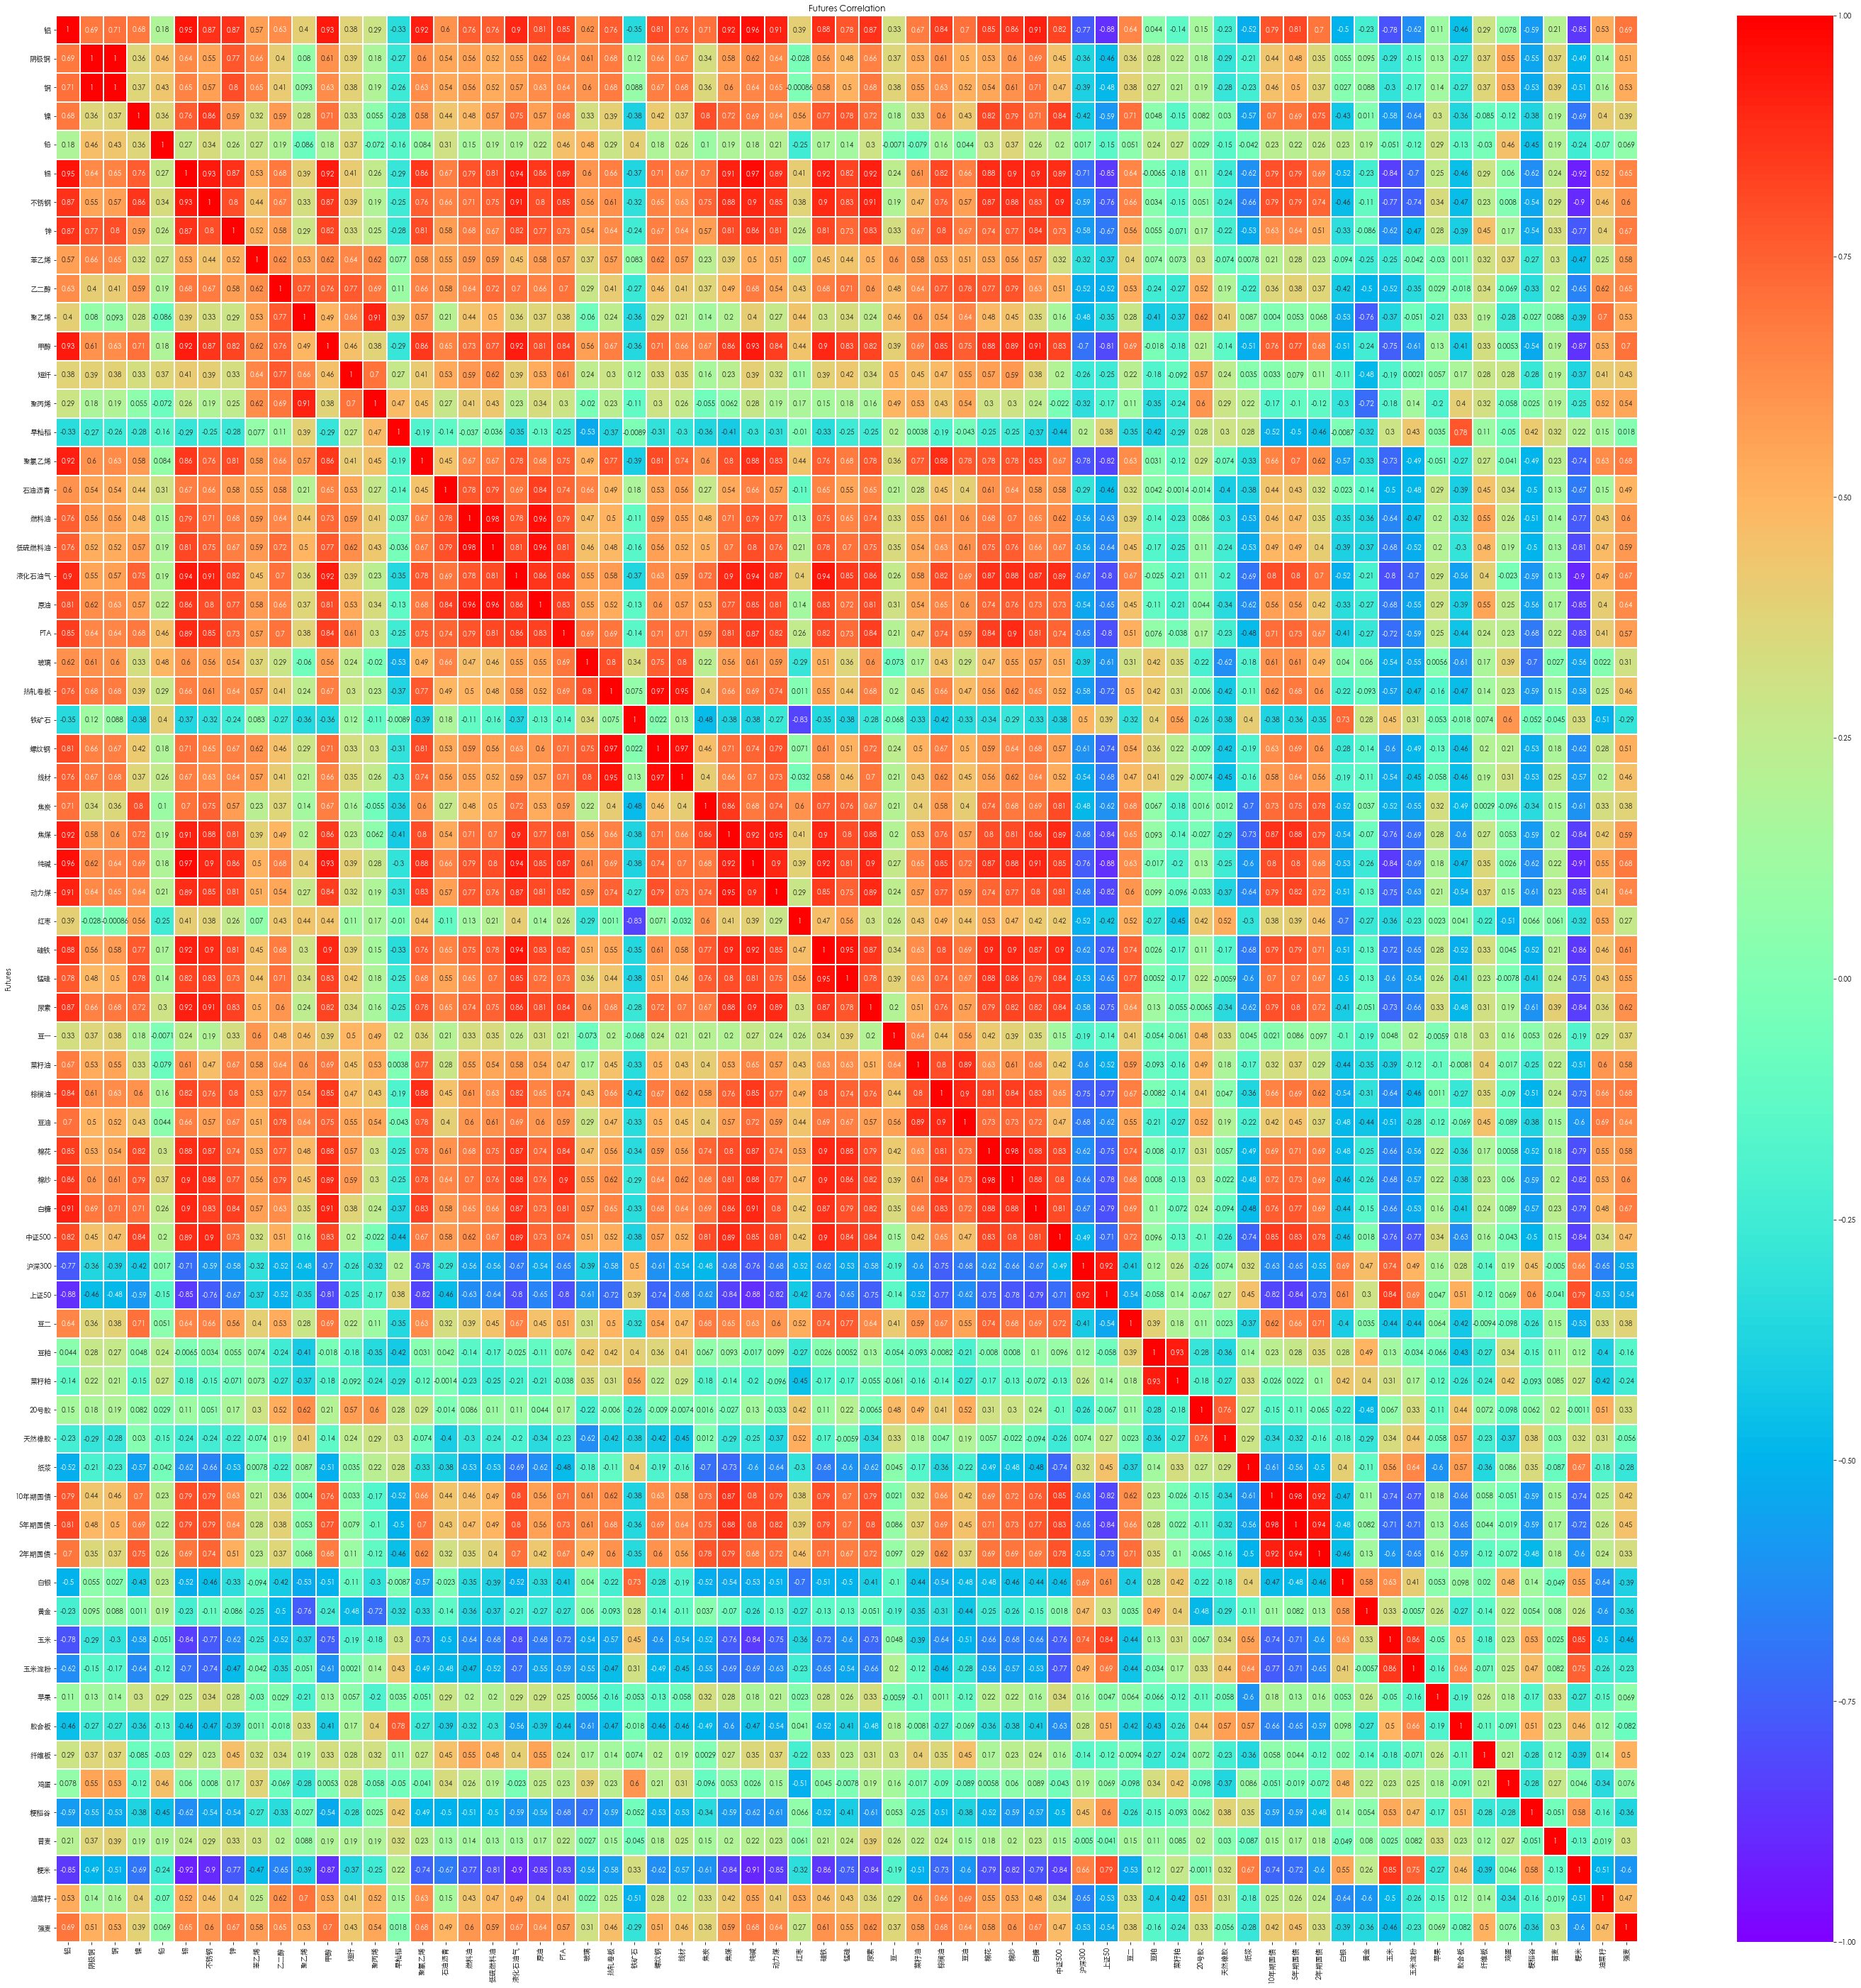

In [19]:
date_index = list(df[IDlist[0]].index)

futuresMat = pd.DataFrame(index=date_index)

num = len(IDlist)
for i in range(num):
    #连接不同期货价格并对列重命名
    futuresMat = pd.concat([futuresMat, df[IDlist[i]]['close']], axis=1).rename(columns={'close': namejoint[i]}) 

futuresCorr = futuresMat.corr(method='spearman')

fig, ax = plt.subplots(figsize=(50, 50))
 
sns.heatmap(futuresCorr, linewidths = 0.05, ax = ax, vmax=1, vmin=-1, cmap='rainbow', annot=True)
ax.set_title('Futures Correlation')
ax.set_xlabel('')
# ax.set_xticklabels([]) #设置x轴图例为空值
ax.set_ylabel('Futures')
# ax.figure.savefig('Futures Correlation.jpg')

In [20]:
f = Futures('甲醇')
f.getinfo()

C:\Users\YHM\AppData\Local\Temp/ipykernel_12536/471800129.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['start_date'] = pd.to_datetime(main['start_date'])
C:\Users\YHM\AppData\Local\Temp/ipykernel_12536/471800129.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['end_date'] = pd.to_datetime(main['end_date'])


,ID,name,shortname
33,MA9999.XZCE,甲醇主力合约,甲醇


In [21]:
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=6)

embedding = node_position_model.fit_transform(X.T).T

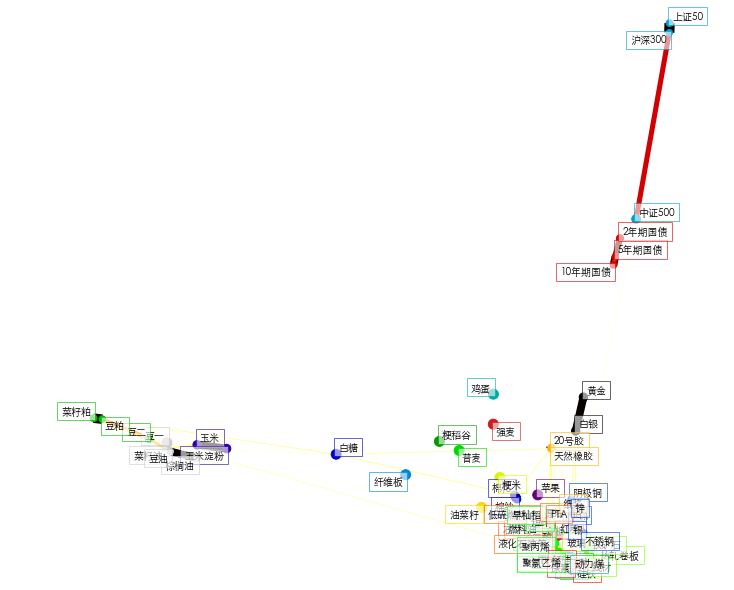

In [22]:
# Visualization
plt.figure(1, facecolor='w', figsize=(10, 8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()  #偏相关分析
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=plt.cm.nipy_spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)

segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(code, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    # print(dx)
    # print(this_dx)
    # exit()
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.nipy_spectral(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()

In [23]:
a = Futures('豆二')
a.getinfo()['ID']
a.getfullname()

C:\Users\YHM\AppData\Local\Temp/ipykernel_12536/471800129.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['start_date'] = pd.to_datetime(main['start_date'])
C:\Users\YHM\AppData\Local\Temp/ipykernel_12536/471800129.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['end_date'] = pd.to_datetime(main['end_date'])


['豆二主力合约']